In [ ]:
import numpy as np
from math import pi
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# abc model (a watershed water balance model with 3 parameters)from:
# Vogel, R. M., and Sankarasubramanian, A. (2003), Validation of a watershed model without calibration, Water Resour. Res., 39, 1292, doi:10.1029/2002WR001940, 10.
def abc(P,G0=0,a=0.6880,b=0.1792,c=0.2780):
  Q=np.zeros(P.shape[0])
  G=G0
  for i in range(P.shape[0]):
    Q[i]=(1-a-b)*P[i]+c*G
    G=(1-c)*G+a*P[i]
  return Q

Text(0, 0.5, 'y')

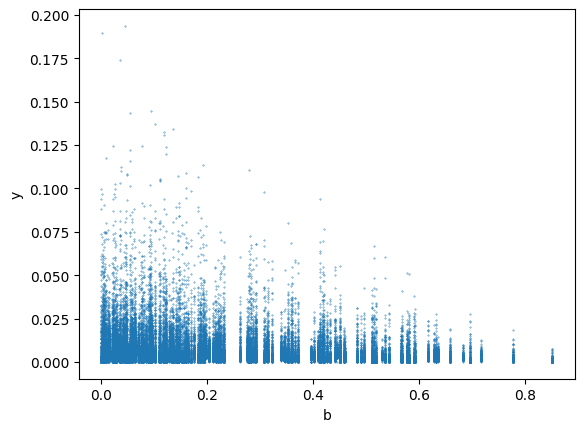

In [ ]:
y=np.array([])
B=[]
for i in range(200):
  a=np.random.uniform(low=0.0, high=1.0)
  b=np.random.uniform(low=0.0, high=1.0-a)
  B.append(b)
  c=np.random.uniform(low=0.0, high=1.0)
  P=np.random.beta(a=betta_a, b=betta_b,size=200)*betta_scale+betta_loc
  y=np.append(y,abc(P,G0=0,a=a,b=b,c=c))
B=np.array(B)
B=np.repeat(B,200)
plt.scatter(B,y,s=0.1)
plt.xlabel("b")
plt.ylabel("y")

In [ ]:
# read pricipitation data
data=pd.read_csv("/content/data.txt",header = None ,delimiter = "\t")
precipitation=data[0].values

In [ ]:
pip install fitter

  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=a25aabb1c7fb5bca93b583e28ccaaaa79701d869a0c0932275a111cc901a95be
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter


Fitting 15 distributions: 100%|██████████| 15/15 [00:02<00:00,  6.45it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.002420,1890.201179,-4264.057811,inf,0.350201,5.655773e-40
chi2,0.003270,11267.916444,-4161.558652,inf,0.543708,2.938654e-100
exponpow,0.003326,1472.282525,-4155.511864,inf,0.336111,8.988220e-37
lognorm,0.005312,1613.544526,-3986.960982,inf,0.336111,8.987982e-37
gamma,0.005535,1646.279730,-3972.130339,inf,0.336111,8.987982e-37


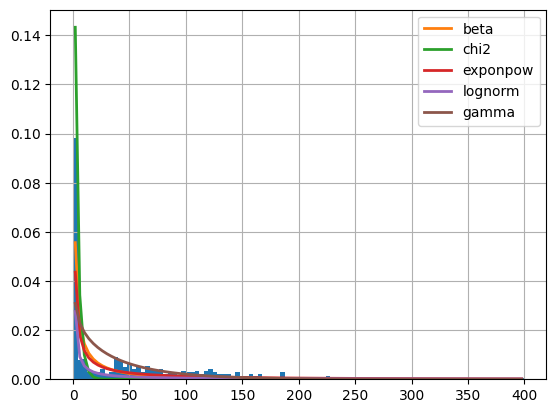

In [ ]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
# find the best match distribution for precipitation data
f = Fitter(precipitation,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm",
                          'cauchy',
                          'chi2',
                          'expon',
                          'exponpow',
                          'gamma',
                          'lognorm',
                          'norm',
                          'powerlaw',
                          'rayleigh',
                          'uniform'])
f.fit()
f.summary()

In [ ]:
# find parameters of betta distribution
betta_a=f.get_best(method = 'sumsquare_error')["beta"]["a"]
betta_b=f.get_best(method = 'sumsquare_error')["beta"]["b"]
betta_loc=f.get_best(method = 'sumsquare_error')["beta"]["b"]
betta_scale=f.get_best(method = 'sumsquare_error')["beta"]["b"]
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 0.23988695969936633,
  'b': 24.053310038119534,
  'loc': -2.76126312081761e-30,
  'scale': 1543.0547732112127}}

In [ ]:
from scipy.stats import kstest

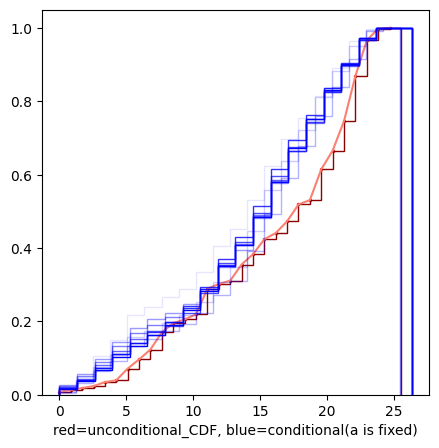

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
axs.set_xlabel("red=unconditional_CDF, blue=conditional(a is fixed)")

# generate y_unconditional CDF by varying all parameters
y_unconditional=np.array(0)
for i in range(50):
  a=np.random.uniform(low=0.0, high=1.0)
  b=np.random.uniform(low=0.0, high=1.0-a)
  c=np.random.uniform(low=0.0, high=1.0)
  P=np.random.beta(a=betta_a, b=betta_b,size=20)*betta_scale+betta_loc
  y_unconditional=np.append(y_unconditional,abc(P,G0=0,a=a,b=b,c=c))
CDF,y_value,patches=plt.hist(y_unconditional,bins=30,cumulative=True,
         histtype='step',density=True, color='darkred')
axs.plot(y_value[:-1],CDF,color="salmon")
axs.scatter(y_value[:-1],CDF,s=2,color="red")

# generate y_conditional CDF by varying all parameters except a (for 10 fix value of a)
y=np.array(0)
kstest_valuesa=[]
a_value=[]
for j in range(9):
  a=np.random.uniform(low=0.0, high=1.0)
  a_value.append(a)
  for i in range(50):
    b=np.random.uniform(low=0.0, high=1.0-a)
    c=np.random.uniform(low=0.0, high=1.0)
    P=np.random.beta(a=betta_a, b=betta_b,size=20)*betta_scale+betta_loc
    y=np.append(y,abc(P,G0=0,b=b,a=a,c=c))
  CDF,y_values,patches=plt.hist(y,bins=20,cumulative=True,density=True, label='CDF',
        histtype='step',alpha=0.1*j, color='b')
  kstest_valuesa.append(kstest(y_unconditional, y).statistic)
a_value.append(0.6880)
for i in range(50):
  b=np.random.uniform(low=0.0, high=1.0-0.6880)
  c=np.random.uniform(low=0.0, high=1.0)
  P=np.random.beta(a=betta_a, b=betta_b,size=20)*betta_scale+betta_loc
  y=np.append(y,abc(P,G0=0,b=b,c=c))
CDF,y_values,patches=plt.hist(y,bins=20,cumulative=True,density=True, label='CDF',
        histtype='step', color='b')
kstest_valuesa.append(kstest(y_unconditional, y).statistic)
# axs.plot(y_values[:-1],CDF,alpha=0.2*j/2,color="skyblue")
# axs.scatter(y_values[:-1],CDF,s=2,alpha=0.1*j/2,)

Text(0, 0.5, 'KS')

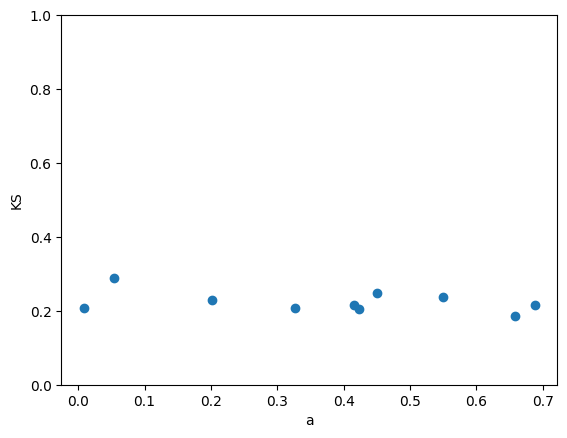

In [ ]:
# scatter plot of KS value for 10 conditining value of a
plt.scatter(a_value,kstest_valuesa)
plt.ylim(0,1)
plt.xlabel("a")
plt.ylabel("KS")

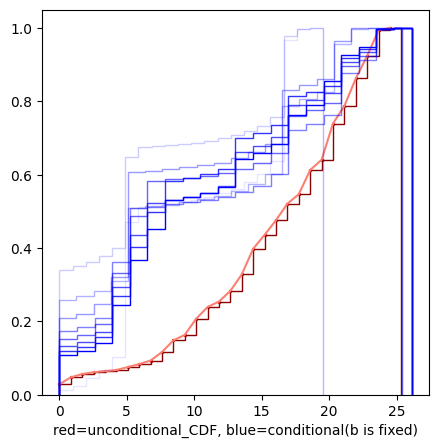

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
axs.set_xlabel("red=unconditional_CDF, blue=conditional(b is fixed)")

# generate y_unconditional CDF by varying all parameters
y_unconditional=np.array(0)
for i in range(50):
  a=np.random.uniform(low=0.0, high=1.0)
  b=np.random.uniform(low=0.0, high=1.0-a)
  c=np.random.uniform(low=0.0, high=1.0)
  P=np.random.beta(a=betta_a, b=betta_b,size=20)*betta_scale+betta_loc
  y_unconditional=np.append(y_unconditional,abc(P,G0=0,a=a,b=b,c=c))
CDF,y_value,patches=plt.hist(y_unconditional,bins=30,cumulative=True,
         histtype='step',density=True, color='darkred')
axs.plot(y_value[:-1],CDF,color="salmon")
axs.scatter(y_value[:-1],CDF,s=2,color="red")

# generate y_conditional CDF by varying all parameters except b (for 10 fix value of b)
y=np.array(0)
kstest_valuesb=[]
b_value=[]
for j in range(9):
  b=np.random.uniform(low=0.0, high=1.0)
  b_value.append(b)
  for i in range(50):
    a=np.random.uniform(low=0.0, high=1.0-b)
    c=np.random.uniform(low=0.0, high=1.0)
    P=np.random.beta(a=betta_a, b=betta_b,size=20)*betta_scale+betta_loc
    y=np.append(y,abc(P,G0=0,b=b,a=a,c=c))
  CDF,y_values,patches=plt.hist(y,bins=20,cumulative=True,density=True, label='CDF',
        histtype='step',alpha=0.1*j, color='b')
  kstest_valuesb.append(kstest(y_unconditional, y).statistic)
b_value.append(0.1792)
for i in range(50):
  a=np.random.uniform(low=0.0, high=1.0-0.1792)
  c=np.random.uniform(low=0.0, high=1.0)
  P=np.random.beta(a=betta_a, b=betta_b,size=20)*betta_scale+betta_loc
  y=np.append(y,abc(P,G0=0,a=a,c=c))
CDF,y_values,patches=plt.hist(y,bins=20,cumulative=True,density=True, label='CDF',
        histtype='step', color='b')
kstest_valuesb.append(kstest(y_unconditional, y).statistic)
# axs.plot(y_values[:-1],CDF,alpha=0.2*j/2,color="skyblue")
# axs.scatter(y_values[:-1],CDF,s=2,alpha=0.1*j/2,)

Text(0, 0.5, 'KS')

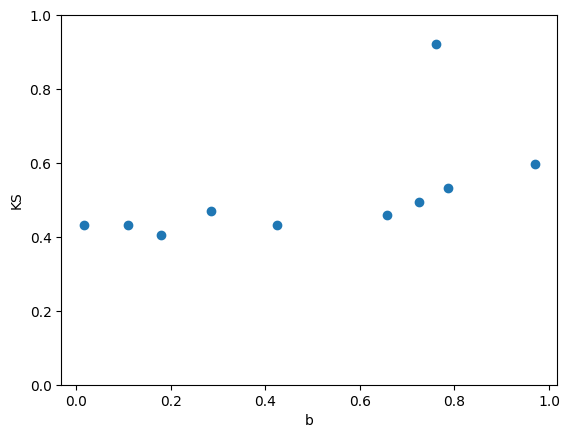

In [ ]:
# scatter plot of KS value for 10 conditining value of b
plt.scatter(b_value,kstest_valuesb)
plt.ylim(0,1)
plt.xlabel("b")
plt.ylabel("KS")

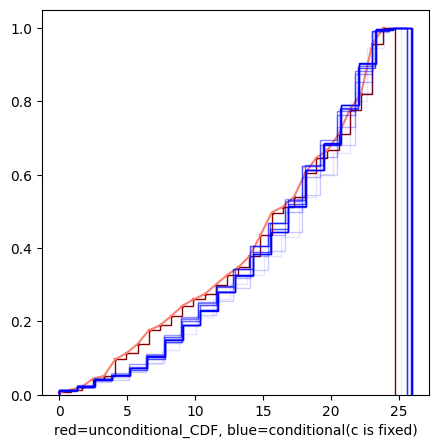

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
axs.set_xlabel("red=unconditional_CDF, blue=conditional(c is fixed)")

# generate y_unconditional CDF by varying all parameters
y_unconditional=np.array(0)
for i in range(50):
  a=np.random.uniform(low=0.0, high=1.0)
  b=np.random.uniform(low=0.0, high=1.0-a)
  c=np.random.uniform(low=0.0, high=1.0)
  P=np.random.beta(a=betta_a, b=betta_b,size=20)*betta_scale+betta_loc
  y_unconditional=np.append(y_unconditional,abc(P,G0=0,a=a,b=b,c=c))
CDF,y_value,patches=plt.hist(y_unconditional,bins=30,cumulative=True,
         histtype='step',density=True, color='darkred')
axs.plot(y_value[:-1],CDF,color="salmon")
axs.scatter(y_value[:-1],CDF,s=2,color="red")

# generate y_conditional CDF by varying all parameters except c (for 10 fix value of c)
y=np.array(0)
kstest_valuesc=[]
c_value=[]
for j in range(9):
  c=np.random.uniform(low=0.0, high=1.0)
  c_value.append(c)
  for i in range(50):
    a=np.random.uniform(low=0.0, high=1.0)
    b=np.random.uniform(low=0.0, high=1.0-a)
    P=np.random.beta(a=betta_a, b=betta_b,size=20)*betta_scale+betta_loc
    y=np.append(y,abc(P,G0=0,b=b,a=a,c=c))
  CDF,y_values,patches=plt.hist(y,bins=20,cumulative=True,density=True, label='CDF',
        histtype='step',alpha=0.1*j, color='b')
  kstest_valuesc.append(kstest(y_unconditional, y).statistic)
c_value.append(0.2780)
for i in range(50):
  a=np.random.uniform(low=0.0, high=1.0)
  b=np.random.uniform(low=0.0, high=1.0-a)
  P=np.random.beta(a=betta_a, b=betta_b,size=20)*betta_scale+betta_loc
  y=np.append(y,abc(P,G0=0,b=b,a=a))
CDF,y_values,patches=plt.hist(y,bins=20,cumulative=True,density=True, label='CDF',
        histtype='step', color='b')
kstest_valuesc.append(kstest(y_unconditional, y).statistic)
# axs.plot(y_values[:-1],CDF,alpha=0.2*j/2,color="skyblue")
# axs.scatter(y_values[:-1],CDF,s=2,alpha=0.1*j/2,)

Text(0, 0.5, 'KS')

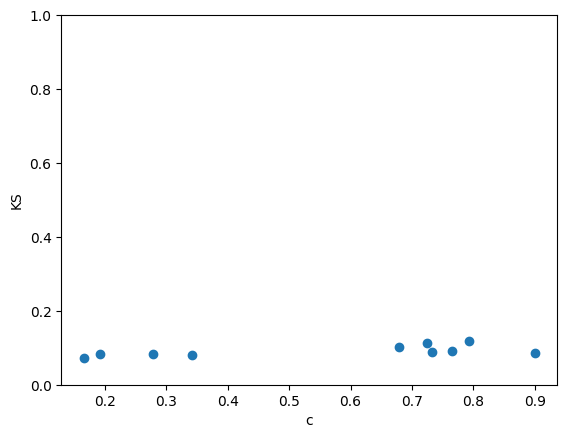

In [ ]:
# scatter plot of KS value for 10 conditining value of c
plt.scatter(c_value,kstest_valuesc)
plt.ylim(0,1)
plt.xlabel("c")
plt.ylabel("KS")

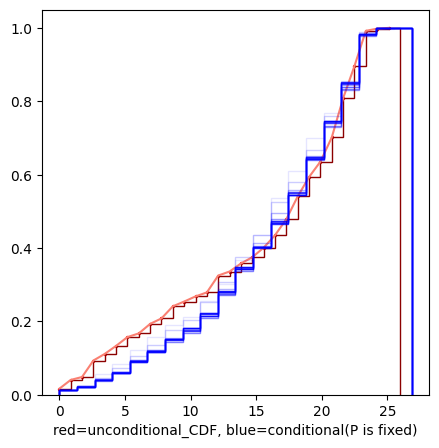

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
axs.set_xlabel("red=unconditional_CDF, blue=conditional(P is fixed)")

# generate y_unconditional CDF by varying all parameters
y_unconditional=np.array(0)
for i in range(50):
  a=np.random.uniform(low=0.0, high=1.0)
  b=np.random.uniform(low=0.0, high=1.0-a)
  c=np.random.uniform(low=0.0, high=1.0)
  P=np.random.beta(a=betta_a, b=betta_b,size=20)*betta_scale+betta_loc
  y_unconditional=np.append(y_unconditional,abc(P,G0=0,a=a,b=b,c=c))
CDF,y_value,patches=plt.hist(y_unconditional,bins=30,cumulative=True,
         histtype='step',density=True, color='darkred')
axs.plot(y_value[:-1],CDF,color="salmon")
axs.scatter(y_value[:-1],CDF,s=2,color="red")

# generate y_conditional CDF by varying all parameters except input P (for 10 fix value of P)
y=np.array(0)
kstest_valuesp=[]
p_value=[]
for j in range(10):
  P=np.random.beta(a=betta_a, b=betta_b,size=20)*betta_scale+betta_loc
  p_value.append(np.median(P))
  for i in range(50):
    a=np.random.uniform(low=0.0, high=1.0)
    b=np.random.uniform(low=0.0, high=1.0-a)
    c=np.random.uniform(low=0.0, high=1.0)
    y=np.append(y,abc(P,a=a,G0=0,b=b,c=c))
  CDF,y_values,patches=plt.hist(y,bins=20,cumulative=True,density=True, label='CDF',
        histtype='step',alpha=0.1*j, color='b')
  kstest_valuesp.append(kstest(y_unconditional, y).statistic)
# axs.plot(y_values[:-1],CDF,alpha=0.2*j/2,color="skyblue")
# axs.scatter(y_values[:-1],CDF,s=2,alpha=0.1*j/2,)

Text(0, 0.5, 'KS')

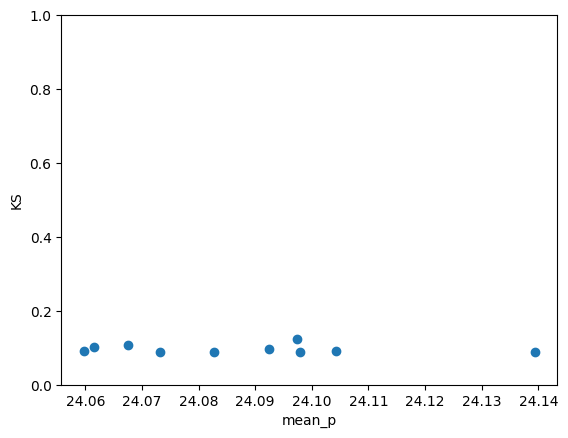

In [ ]:
# scatter plot of KS value for 10 conditining value of mean_p
plt.scatter(p_value,kstest_valuesp)
plt.ylim(0,1)
plt.xlabel("mean_p")
plt.ylabel("KS")

In [ ]:
print("PAWN Sensivity indexes")
print(f"median_kstest_values_a= {np.median(kstest_valuesa)}")
print(f"median_kstest_values_b= {np.median(kstest_valuesb)}")
print(f"median_kstest_values_c= {np.median(kstest_valuesc)}")
print(f"median_kstest_values_P= {np.median(kstest_valuesp)}")

PAWN Sensivity indexes
median_kstest_values_a= 0.21565991779127947
median_kstest_values_b= 0.46440039299078617
median_kstest_values_c= 0.0862358474278977
median_kstest_values_P= 0.09118356909192443
